In [8]:
import pandas as pd
from sklearn import datasets # sklearn comes with some toy datasets to practise
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics import calinski_harabasz_score


import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
X = pd.read_csv('merged_data.csv')


#X = pd.DataFrame(data["data"], columns=data["feature_names"])

#print()
X.head()

,Unnamed: 0,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,...,id,uri,track_href,analysis_url,duration_ms,time_signature,genre,Songs,hot/not_hot,Artists
0,0,0.838,0.626,0,-4.214,1,0.0396,0.00211,0.000059,0.0221,...,['1E8S3CSv20KrKT0C1yAjkO'],spotify:track:5YZRZqEkrteLmxvseHnQ2K,https://api.spotify.com/v1/tracks/5YZRZqEkrteL...,https://api.spotify.com/v1/audio-analysis/5YZR...,163514,4,Rap,Live Television,N,NaN
1,1,0.611,0.478,0,-5.839,1,0.1070,0.03500,0.000000,0.1070,...,['1AH60dMaEfNjzDoUIFwIQi'],spotify:track:1AH60dMaEfNjzDoUIFwIQi,https://api.spotify.com/v1/tracks/1AH60dMaEfNj...,https://api.spotify.com/v1/audio-analysis/1AH6...,258158,4,Rap,Beast Mode (feat. PnB Rock & YoungBoy Never Br...,N,NaN
2,2,0.744,0.697,11,-5.063,0,0.1970,0.01060,0.000000,0.0842,...,['2VevYw2rnvupfV0gWhXKxA'],spotify:track:17husT8tMWaBHcQqUpYDZQ,https://api.spotify.com/v1/tracks/17husT8tMWaB...,https://api.spotify.com/v1/audio-analysis/17hu...,247413,4,Hiphop,Make It Rain,N,NaN
3,3,0.823,0.703,8,-2.691,1,0.2980,0.01610,0.000001,0.2940,...,['50I7FNN2rl2rWiNwGxS146'],spotify:track:50I7FNN2rl2rWiNwGxS146,https://api.spotify.com/v1/tracks/50I7FNN2rl2r...,https://api.spotify.com/v1/audio-analysis/50I7...,194214,4,Rap,No Opp Left Behind,N,NaN
4,4,0.649,0.200,2,-19.410,1,0.0507,0.83900,0.000306,0.2060,...,['6UObhqa3DmniQ0YTWg2AqW'],spotify:track:5zDPkwHEID3BErCrgPbBOw,https://api.spotify.com/v1/tracks/5zDPkwHEID3B...,https://api.spotify.com/v1/audio-analysis/5zDP...,160325,4,Dark Trap,Storyboard for a Pessimist,N,NaN


In [10]:
kmeans = KMeans(n_clusters=8, random_state=1234)
kmeans.fit(X_scaled_df)

NameError: name 'X_scaled_df' is not defined

In [11]:
def kmeans_clustering(audio_features_df, num_clusters, audio_feature_columns):
    # Select the columns for clustering
    data = audio_features_df[audio_feature_columns]

    # Create a K-Means model
    kmeans = KMeans(n_clusters=num_clusters, random_state=0)

    # Fit the K-Means model to the data
    kmeans.fit(data)

    # Assign cluster labels to the original DataFrame
    audio_features_df['cluster_label'] = kmeans.labels_

    # Calculate the Calinski-Harabasz score
    calinski_score = calinski_harabasz_score(data, kmeans.labels_)

    return audio_features_df, calinski_score


In [12]:
songs_df=pd.read_csv(r'.\data\not_top100.csv')

In [13]:
songs_df.head()

,song_name,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,...,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature,genre,hot
0,Mercury: Retrograde,0.831,0.814,2,-7.364,1,0.4200,0.0598,0.013400,0.0556,...,156.985,audio_features,2Vc6NJ9PW9gD9q343XFRKx,spotify:track:2Vc6NJ9PW9gD9q343XFRKx,https://api.spotify.com/v1/tracks/2Vc6NJ9PW9gD...,https://api.spotify.com/v1/audio-analysis/2Vc6...,124539,4,Dark Trap,N
1,Pathology,0.719,0.493,8,-7.230,1,0.0794,0.4010,0.000000,0.1180,...,115.080,audio_features,7pgJBLVz5VmnL7uGHmRj6p,spotify:track:7pgJBLVz5VmnL7uGHmRj6p,https://api.spotify.com/v1/tracks/7pgJBLVz5Vmn...,https://api.spotify.com/v1/audio-analysis/7pgJ...,224427,4,Dark Trap,N
2,Symbiote,0.850,0.893,5,-4.783,1,0.0623,0.0138,0.000004,0.3720,...,218.050,audio_features,0vSWgAlfpye0WCGeNmuNhy,spotify:track:0vSWgAlfpye0WCGeNmuNhy,https://api.spotify.com/v1/tracks/0vSWgAlfpye0...,https://api.spotify.com/v1/audio-analysis/0vSW...,98821,4,Dark Trap,N
3,ProductOfDrugs (Prod. The Virus and Antidote),0.476,0.781,0,-4.710,1,0.1030,0.0237,0.000000,0.1140,...,186.948,audio_features,0VSXnJqQkwuH2ei1nOQ1nu,spotify:track:0VSXnJqQkwuH2ei1nOQ1nu,https://api.spotify.com/v1/tracks/0VSXnJqQkwuH...,https://api.spotify.com/v1/audio-analysis/0VSX...,123661,3,Dark Trap,N
4,Venom,0.798,0.624,2,-7.668,1,0.2930,0.2170,0.000000,0.1660,...,147.988,audio_features,4jCeguq9rMTlbMmPHuO7S3,spotify:track:4jCeguq9rMTlbMmPHuO7S3,https://api.spotify.com/v1/tracks/4jCeguq9rMTl...,https://api.spotify.com/v1/audio-analysis/4jCe...,123298,4,Dark Trap,N


In [14]:
sampled_df = songs_df.sample(n=1000, random_state=42)
sampled_df

,song_name,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,...,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature,genre,hot
3533,Deep South,0.632,0.849,8,-8.641,0,0.0637,0.14000,0.865000,0.1090,...,133.948,audio_features,7oMFpfiP2K4frK1rhjMC2H,spotify:track:7oMFpfiP2K4frK1rhjMC2H,https://api.spotify.com/v1/tracks/7oMFpfiP2K4f...,https://api.spotify.com/v1/audio-analysis/7oMF...,247130,4,Dark Trap,N
3616,Touch,0.545,0.498,2,-7.459,1,0.1930,0.43600,0.902000,0.2910,...,135.968,audio_features,6nS3ZVJ0ARNdd4uMQqPUoa,spotify:track:6nS3ZVJ0ARNdd4uMQqPUoa,https://api.spotify.com/v1/tracks/6nS3ZVJ0ARNd...,https://api.spotify.com/v1/audio-analysis/6nS3...,197701,4,Dark Trap,N
14340,GOOBA,0.611,0.688,1,-5.688,1,0.3410,0.02640,0.000000,0.2510,...,178.462,audio_features,4NhDYoQTYCdWHTvlbGVgwo,spotify:track:4NhDYoQTYCdWHTvlbGVgwo,https://api.spotify.com/v1/tracks/4NhDYoQTYCdW...,https://api.spotify.com/v1/audio-analysis/4NhD...,132303,4,Rap,N
16301,Always On Time,0.839,0.706,5,-6.119,0,0.2310,0.19000,0.000000,0.2050,...,193.340,audio_features,4YA7nxDtAVE2R1Eryx7uRu,spotify:track:4YA7nxDtAVE2R1Eryx7uRu,https://api.spotify.com/v1/tracks/4YA7nxDtAVE2...,https://api.spotify.com/v1/audio-analysis/4YA7...,245373,4,RnB,N
7204,Vodka Sauce Freestyle!,0.916,0.776,9,-6.927,1,0.1830,0.06560,0.000000,0.0963,...,134.973,audio_features,5X2bCEwDo89Rg1haCjJElP,spotify:track:5X2bCEwDo89Rg1haCjJElP,https://api.spotify.com/v1/tracks/5X2bCEwDo89R...,https://api.spotify.com/v1/audio-analysis/5X2b...,110222,4,Underground Rap,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18835,Da Bichez,0.740,0.552,6,-10.193,1,0.3100,0.00293,0.000000,0.1100,...,179.976,audio_features,7jM8Kk1CPcX6gyeWZjarBT,spotify:track:7jM8Kk1CPcX6gyeWZjarBT,https://api.spotify.com/v1/tracks/7jM8Kk1CPcX6...,https://api.spotify.com/v1/audio-analysis/7jM8...,232307,4,Hiphop,N
10899,Boy You're Wrong,0.720,0.916,4,-2.807,0,0.1780,0.00103,0.000003,0.2640,...,158.972,audio_features,4iownB9gM7qfyNqyj6Ssx6,spotify:track:4iownB9gM7qfyNqyj6Ssx6,https://api.spotify.com/v1/tracks/4iownB9gM7qf...,https://api.spotify.com/v1/audio-analysis/4iow...,150961,4,Trap Metal,N
12788,How You Remind Me,0.612,0.698,0,-7.224,1,0.0357,0.24800,0.000003,0.1190,...,136.031,audio_features,00tB8c71eTcG5jV7PhuF4Q,spotify:track:00tB8c71eTcG5jV7PhuF4Q,https://api.spotify.com/v1/tracks/00tB8c71eTcG...,https://api.spotify.com/v1/audio-analysis/00tB...,245360,4,Emo,N
4505,Reasons,0.268,0.721,9,-7.331,0,0.1300,0.26300,0.000000,0.3920,...,137.050,audio_features,0kdOP1fzdJWgsWJUVdu1nU,spotify:track:0kdOP1fzdJWgsWJUVdu1nU,https://api.spotify.com/v1/tracks/0kdOP1fzdJWg...,https://api.spotify.com/v1/audio-analysis/0kdO...,206957,4,Dark Trap,N


In [15]:
# Assuming audio_features_df is your audio features DataFrame and audio_feature_columns is a list of column names for clustering.
num_clusters = 3  # Set the number of clusters you want
#audio_feature_columns=["danceability","energy"]
audio_feature_columns=["danceability","tempo"]
clustered_df, calinski_score = kmeans_clustering(songs_df, num_clusters, audio_feature_columns)

C:\Users\Megha\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [16]:
clustered_df

,song_name,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,...,type,id,uri,track_href,analysis_url,duration_ms,time_signature,genre,hot,cluster_label
0,Mercury: Retrograde,0.831,0.814,2,-7.364,1,0.4200,0.05980,0.013400,0.0556,...,audio_features,2Vc6NJ9PW9gD9q343XFRKx,spotify:track:2Vc6NJ9PW9gD9q343XFRKx,https://api.spotify.com/v1/tracks/2Vc6NJ9PW9gD...,https://api.spotify.com/v1/audio-analysis/2Vc6...,124539,4,Dark Trap,N,0
1,Pathology,0.719,0.493,8,-7.230,1,0.0794,0.40100,0.000000,0.1180,...,audio_features,7pgJBLVz5VmnL7uGHmRj6p,spotify:track:7pgJBLVz5VmnL7uGHmRj6p,https://api.spotify.com/v1/tracks/7pgJBLVz5Vmn...,https://api.spotify.com/v1/audio-analysis/7pgJ...,224427,4,Dark Trap,N,2
2,Symbiote,0.850,0.893,5,-4.783,1,0.0623,0.01380,0.000004,0.3720,...,audio_features,0vSWgAlfpye0WCGeNmuNhy,spotify:track:0vSWgAlfpye0WCGeNmuNhy,https://api.spotify.com/v1/tracks/0vSWgAlfpye0...,https://api.spotify.com/v1/audio-analysis/0vSW...,98821,4,Dark Trap,N,1
3,ProductOfDrugs (Prod. The Virus and Antidote),0.476,0.781,0,-4.710,1,0.1030,0.02370,0.000000,0.1140,...,audio_features,0VSXnJqQkwuH2ei1nOQ1nu,spotify:track:0VSXnJqQkwuH2ei1nOQ1nu,https://api.spotify.com/v1/tracks/0VSXnJqQkwuH...,https://api.spotify.com/v1/audio-analysis/0VSX...,123661,3,Dark Trap,N,1
4,Venom,0.798,0.624,2,-7.668,1,0.2930,0.21700,0.000000,0.1660,...,audio_features,4jCeguq9rMTlbMmPHuO7S3,spotify:track:4jCeguq9rMTlbMmPHuO7S3,https://api.spotify.com/v1/tracks/4jCeguq9rMTl...,https://api.spotify.com/v1/audio-analysis/4jCe...,123298,4,Dark Trap,N,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21486,Daddy's Girl,0.538,0.819,1,-6.780,1,0.4670,0.00854,0.000000,0.1310,...,audio_features,4YuGxSdxyL6fRD7uchn9dI,spotify:track:4YuGxSdxyL6fRD7uchn9dI,https://api.spotify.com/v1/tracks/4YuGxSdxyL6f...,https://api.spotify.com/v1/audio-analysis/4YuG...,209582,4,Hiphop,N,0
21487,'94,0.415,0.548,7,-8.563,1,0.2850,0.22400,0.000000,0.1220,...,audio_features,034dSXepspHaYFW7rZZx1d,spotify:track:034dSXepspHaYFW7rZZx1d,https://api.spotify.com/v1/tracks/034dSXepspHa...,https://api.spotify.com/v1/audio-analysis/034d...,213898,4,Hiphop,N,0
21488,Born 2 Live,0.785,0.648,7,-6.907,1,0.2790,0.01570,0.001980,0.1000,...,audio_features,7oCZpPJcPDZfeIy2t6gqSg,spotify:track:7oCZpPJcPDZfeIy2t6gqSg,https://api.spotify.com/v1/tracks/7oCZpPJcPDZf...,https://api.spotify.com/v1/audio-analysis/7oCZ...,271867,4,Hiphop,N,1
21489,Can't Hold On,0.747,0.832,3,-5.737,0,0.1850,0.23300,0.000014,0.1300,...,audio_features,2kpwzDrLK5KoIk1S5wftX7,spotify:track:2kpwzDrLK5KoIk1S5wftX7,https://api.spotify.com/v1/tracks/2kpwzDrLK5Ko...,https://api.spotify.com/v1/audio-analysis/2kpw...,182040,4,Hiphop,N,1


In [17]:
calinski_score

60702.722773971655

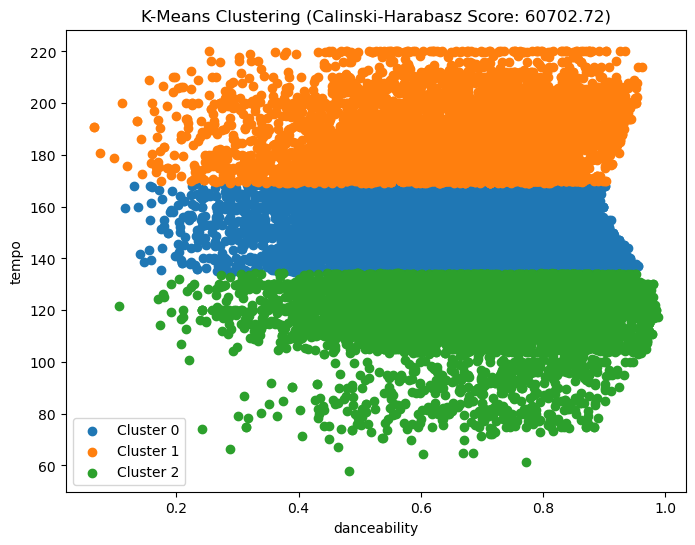

In [18]:
# Plotting the clusters
plt.figure(figsize=(8, 6))

for cluster_label in range(num_clusters):
    cluster_data = clustered_df[clustered_df['cluster_label'] == cluster_label]
    plt.scatter(cluster_data[audio_feature_columns[0]], cluster_data[audio_feature_columns[1]], label=f'Cluster {cluster_label}')

plt.title(f'K-Means Clustering (Calinski-Harabasz Score: {calinski_score:.2f})')
plt.xlabel(audio_feature_columns[0])
plt.ylabel(audio_feature_columns[1])
plt.legend()
plt.show()

In [19]:
# 'genre' is the column we want to one-hot encode

# Perform One-Hot Encoding on the 'genre' column
#audio_features_df_enc = pd.get_dummies(songs_df, columns=['genre'], prefix=['genre'])

from sklearn.preprocessing import LabelEncoder

# Create a LabelEncoder
label_encoder = LabelEncoder()

# Apply label encoding to the 'genre' column
songs_df['genre_enc'] = label_encoder.fit_transform(songs_df['genre'])
songs_df

,song_name,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,...,id,uri,track_href,analysis_url,duration_ms,time_signature,genre,hot,cluster_label,genre_enc
0,Mercury: Retrograde,0.831,0.814,2,-7.364,1,0.4200,0.05980,0.013400,0.0556,...,2Vc6NJ9PW9gD9q343XFRKx,spotify:track:2Vc6NJ9PW9gD9q343XFRKx,https://api.spotify.com/v1/tracks/2Vc6NJ9PW9gD...,https://api.spotify.com/v1/audio-analysis/2Vc6...,124539,4,Dark Trap,N,0,0
1,Pathology,0.719,0.493,8,-7.230,1,0.0794,0.40100,0.000000,0.1180,...,7pgJBLVz5VmnL7uGHmRj6p,spotify:track:7pgJBLVz5VmnL7uGHmRj6p,https://api.spotify.com/v1/tracks/7pgJBLVz5Vmn...,https://api.spotify.com/v1/audio-analysis/7pgJ...,224427,4,Dark Trap,N,2,0
2,Symbiote,0.850,0.893,5,-4.783,1,0.0623,0.01380,0.000004,0.3720,...,0vSWgAlfpye0WCGeNmuNhy,spotify:track:0vSWgAlfpye0WCGeNmuNhy,https://api.spotify.com/v1/tracks/0vSWgAlfpye0...,https://api.spotify.com/v1/audio-analysis/0vSW...,98821,4,Dark Trap,N,1,0
3,ProductOfDrugs (Prod. The Virus and Antidote),0.476,0.781,0,-4.710,1,0.1030,0.02370,0.000000,0.1140,...,0VSXnJqQkwuH2ei1nOQ1nu,spotify:track:0VSXnJqQkwuH2ei1nOQ1nu,https://api.spotify.com/v1/tracks/0VSXnJqQkwuH...,https://api.spotify.com/v1/audio-analysis/0VSX...,123661,3,Dark Trap,N,1,0
4,Venom,0.798,0.624,2,-7.668,1,0.2930,0.21700,0.000000,0.1660,...,4jCeguq9rMTlbMmPHuO7S3,spotify:track:4jCeguq9rMTlbMmPHuO7S3,https://api.spotify.com/v1/tracks/4jCeguq9rMTl...,https://api.spotify.com/v1/audio-analysis/4jCe...,123298,4,Dark Trap,N,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21486,Daddy's Girl,0.538,0.819,1,-6.780,1,0.4670,0.00854,0.000000,0.1310,...,4YuGxSdxyL6fRD7uchn9dI,spotify:track:4YuGxSdxyL6fRD7uchn9dI,https://api.spotify.com/v1/tracks/4YuGxSdxyL6f...,https://api.spotify.com/v1/audio-analysis/4YuG...,209582,4,Hiphop,N,0,2
21487,'94,0.415,0.548,7,-8.563,1,0.2850,0.22400,0.000000,0.1220,...,034dSXepspHaYFW7rZZx1d,spotify:track:034dSXepspHaYFW7rZZx1d,https://api.spotify.com/v1/tracks/034dSXepspHa...,https://api.spotify.com/v1/audio-analysis/034d...,213898,4,Hiphop,N,0,2
21488,Born 2 Live,0.785,0.648,7,-6.907,1,0.2790,0.01570,0.001980,0.1000,...,7oCZpPJcPDZfeIy2t6gqSg,spotify:track:7oCZpPJcPDZfeIy2t6gqSg,https://api.spotify.com/v1/tracks/7oCZpPJcPDZf...,https://api.spotify.com/v1/audio-analysis/7oCZ...,271867,4,Hiphop,N,1,2
21489,Can't Hold On,0.747,0.832,3,-5.737,0,0.1850,0.23300,0.000014,0.1300,...,2kpwzDrLK5KoIk1S5wftX7,spotify:track:2kpwzDrLK5KoIk1S5wftX7,https://api.spotify.com/v1/tracks/2kpwzDrLK5Ko...,https://api.spotify.com/v1/audio-analysis/2kpw...,182040,4,Hiphop,N,1,2


In [20]:
num_clusters = 3  # Set the number of clusters you want
#audio_feature_columns=["danceability","energy"]
audio_feature_columns=["danceability","genre_enc"]
clustered_df, calinski_score = kmeans_clustering(songs_df, num_clusters, audio_feature_columns)

C:\Users\Megha\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


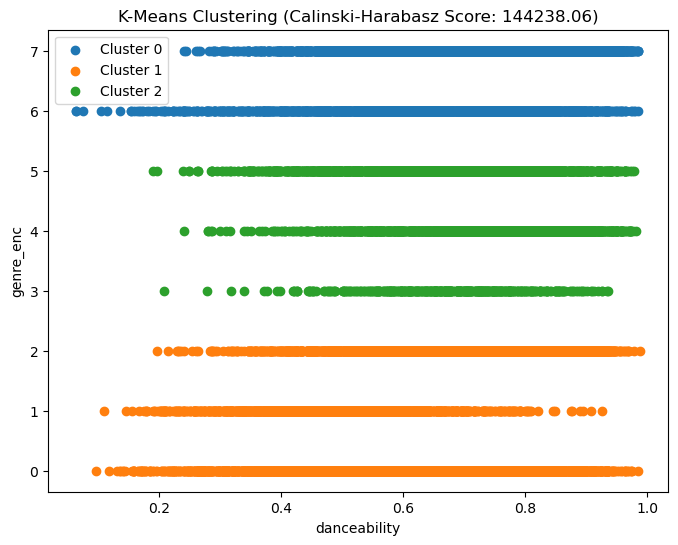

In [21]:
# Plotting the clusters
plt.figure(figsize=(8, 6))

for cluster_label in range(num_clusters):
    cluster_data = clustered_df[clustered_df['cluster_label'] == cluster_label]
    plt.scatter(cluster_data[audio_feature_columns[0]], cluster_data[audio_feature_columns[1]], label=f'Cluster {cluster_label}')

plt.title(f'K-Means Clustering (Calinski-Harabasz Score: {calinski_score:.2f})')
plt.xlabel(audio_feature_columns[0])
plt.ylabel(audio_feature_columns[1])
plt.legend()
plt.show()

In [56]:
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
import sys
from config import *
from sklearn.preprocessing import StandardScaler
sp = spotipy.Spotify(auth_manager=SpotifyClientCredentials(client_id=client_id, client_secret=client_secret))
from sklearn.neighbors import NearestNeighbors

In [71]:
def song_recommendation():
    song = input("Enter the song you want to listen:")
    query = "tracks:" + song 
    results = sp.search(q=query, limit=1)
    items = results['tracks']['items']
    # Check if the song was found on spotify
    if len(items) == 0:
        print("Unable to find song!")
        sample = "No song"
        
        url = None
        return sample, url
    else:
        # Get the first song
        item = items[0]
    # Get the song id
        song_id = item['id']
    
    # Get song features
        features = sp.audio_features((song_id))[0]
        dict_features = { key : [features[key]] for key in list(features.keys()) }
        features_df=pd.DataFrame(dict_features)
    # drop unnecessary columns
        features_df = features_df.drop(columns=["type", "id", "uri", "track_href", "analysis_url", "duration_ms", "time_signature"], axis=1)
    # Scale audio features
        scaler = StandardScaler()
        scaled_features = scaler.fit_transform(features_df)
    #reduce audio features
       # Reduce audio features to danceability and energy
        danceability_energy_df = pd.DataFrame(scaled_features, columns=features_df.columns)[['danceability', 'energy']]
    # predict user cluster
        # Select the columns for clustering, excluding 'uri' and 'song_name'
        

    # Create a K-Means model
        kmeans = KMeans(n_clusters=1, n_init=10, random_state=0)

    # Fit the K-Means model to the data
        kmeans.fit(danceability_energy_df)

    # Assign cluster labels to the original DataFrame
        danceability_energy_df['cluster_label'] = kmeans.labels_
         # Create a k-NN model, excluding 'uri' and 'song_name'
        knn = NearestNeighbors(n_neighbors=4, metric='euclidean', n_jobs=-1)

    # Fit the k-NN model to the clustered data, excluding 'uri' and 'song_name'
        knn.fit(clustered_df[danceability_energy_df.columns.difference(['uri', 'song_name', 'cluster_label'])])
        
    # recommend other song
        # Check song id in hot songs
        is_in_hot_df = clustered_df[(clustered_df['id'] == song_id) & (clustered_df['hot'] == 'H')]

    if len(is_in_hot_df) > 0:
        # If it is recommend a song from hot songs in the same cluster
        sample_df = clustered_df[(clustered_df['hot'] == 'H')].sample(ignore_index=True)
    else:
        # Else recommend a song from the not hot songs in the same cluster
        sample_df = clustered_df[(clustered_df['hot'] == 'N')].sample(ignore_index=True)

    return  sample_df["id"]
       

In [72]:
recommended_song = song_recommendation()

Enter the song you want to listen:paint the town red


In [76]:
full_url = "https://open.spotify.com/track/" + recommended_song.values[0]
print(full_url)


0    75lcPkAkUsKWHGBlGM476R
Name: id, dtype: object
https://open.spotify.com/track/75lcPkAkUsKWHGBlGM476R
